week3 
2015122022
김윤환

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

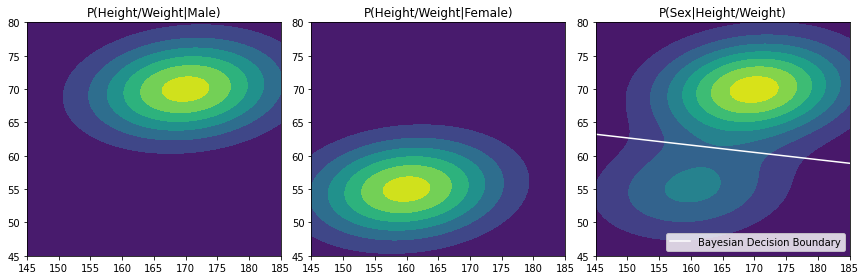

In [2]:
### Define Joint Distribution p(C,x) = p(C)p(x|C)
## Set p(C)
male= 0.7 ; female=0.3

## Set P(x|C): height & weight of male and female
mu_male = np.array([170,70]) ; mu_female=np.array([160,55])
sigma = np.array([[10**2, 0.5*5*2.5],[0.5*5*2.5, 5**2]])
HW_male= multivariate_normal(mu_male, sigma)
HW_female = multivariate_normal(mu_female, sigma)

## Get Joint Distribution p(C,x) = p(C)p(x|C)
# some messy prep works

ht= np.linspace(145,185,500) ; wt=np.linspace(45,80,500)
H, W = np.meshgrid(ht,wt) ; pos = np.dstack((H,W))

# use p(C,x) = p(C)p(x|C)
HW_sex = HW_male.pdf(pos) * male + HW_female.pdf(pos) * female

### Visualize p(C,x) = p(C)p(x|C)
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
ax1.contourf(H, W, HW_male.pdf(pos))
ax1.set(title='P(Height/Weight|Male)')

ax2 = fig.add_subplot(132)
ax2.contourf(H, W, HW_female.pdf(pos))
ax2.set(title='P(Height/Weight|Female)')

ax3 = fig.add_subplot(133)
ax3.contourf(H, W, HW_sex)
ax3.set(title='P(Sex|Height/Weight)')

# plot Bayesian Decision Boundary
inv = np.linalg.inv
m1 = np.matrix(mu_male).T; m2 = np.matrix(mu_female).T
w = inv(sigma) @ (m1 - m2)
w0 = -0.5 * m1.T @ inv(sigma) @ m1 + 0.5 * m2.T @ inv(sigma) @ m2 + np.log(male/female)
bdb = -w0/w[1] - w[0]/w[1] * ht
ax3.plot(ht, bdb.T, label='Bayesian Decision Boundary', color='white')
ax3.legend(loc='lower right')

fig.tight_layout()

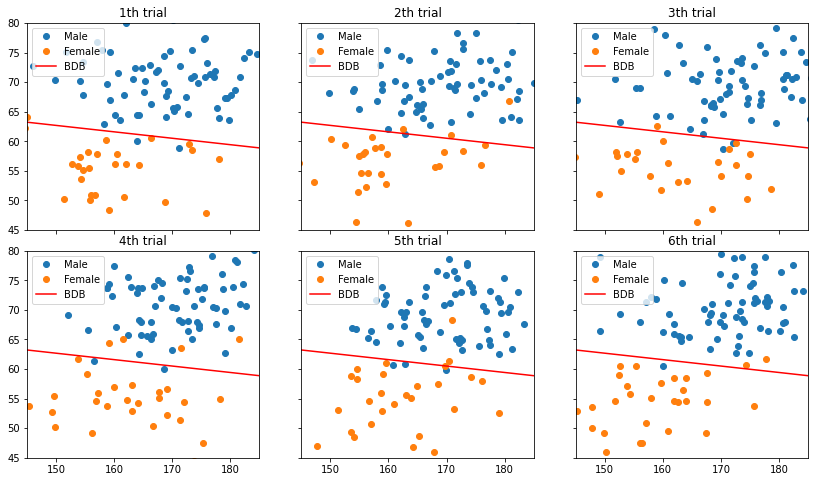

In [3]:
N = 10000

fig, axes = plt.subplots(2,3, sharey=True, sharex=True, figsize=(14,8))
fig.subplots_adjust(hspace=0.1, wspace=0.18)
for i, axi in enumerate(axes.flat, 1):
    
    # Generate samples of male/female
    N_male = int(100 * male); N_female = int(100 * female)
    male_data = HW_male.rvs(N_male)
    female_data = HW_female.rvs(N_female)
    
    # Plot results
    axi.set(xlim=(145, 185), ylim=(45, 80), title='{0}th trial'.format(i))
    axi.plot(male_data[:,0], male_data[:,1], linestyle='', marker='o', label='Male')
    axi.plot(female_data[:,0], female_data[:,1], linestyle='', marker='o', label='Female')
    axi.plot(ht, bdb.T, label='BDB', color='red')
    axi.legend(loc='upper left')

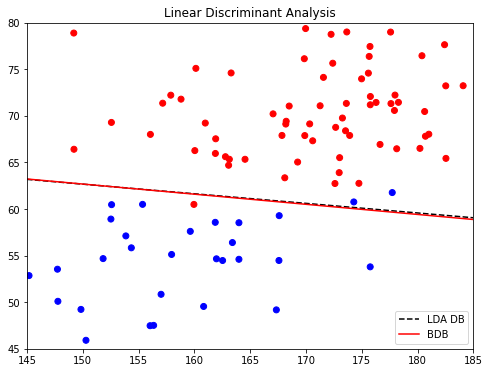

In [4]:
# Rearrange Training data set for LDA fitting
X = np.vstack((male_data, female_data))
y = np.hstack((np.repeat(1, male_data.shape[0]), np.repeat(0, female_data.shape[0])))

# Call LDA function from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis().fit(X,y)
w = clf.coef_; w0 = clf.intercept_
db = -w0/w[:,1] - w[:,0]/w[:,1] * ht

fig, ax = plt.subplots(figsize=(8,6))
ax.set(xlim=(145, 185), ylim=(45, 80), title='Linear Discriminant Analysis')
colors=np.array(['blue','red'])
ax.scatter(X[:,0], X[:,1], color=colors[y])
ax.plot(ht, db.T, label='LDA DB', color='black', linestyle='--')
ax.plot(ht, bdb.T, label='BDB', color='red')
ax.legend()

QDA train Error:  0.95
LDA train Error:  0.86


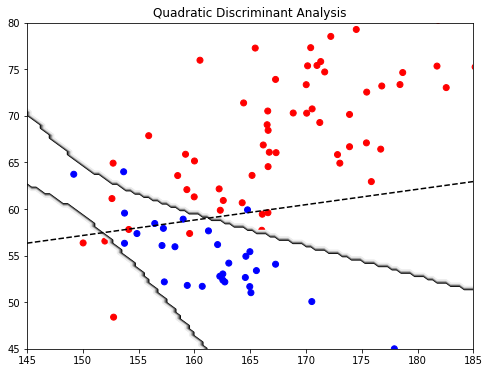

In [5]:
### Generate MVN samples with heterogenous covariance matrix
sigma1 = np.array([[10**2, 0.8*10*8],[0.8*10*8, 8**2]])
sigma2 = np.array([[6**2, -0.7*6*4],[-0.7*6*4, 4**2]])
HW_male = multivariate_normal(mu_male, sigma1)
HW_female = multivariate_normal(mu_female, sigma2)
male_data = HW_male.rvs(N_male)
female_data = HW_female.rvs(N_female)

## Rearrange Training data set for LDA fitting
X = np.vstack((male_data, female_data))
y = np.hstack((np.repeat(1, male_data.shape[0]), np.repeat(0, female_data.shape[0])))

## Call QDA function from sklearn
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis().fit(X,y)
print('QDA train Error: ', clf.score(X,y))

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set(xlim=(145, 185), ylim=(45, 80), title='Quadratic Discriminant Analysis')
colors=np.array(['blue','red'])
ax1.scatter(X[:,0], X[:,1], color=colors[y])

## Plot LDA Decision Boundary
clf_lda = LinearDiscriminantAnalysis().fit(X,y)
w = clf_lda.coef_; w0 = clf_lda.intercept_
db = -w0/w[:,1] - w[:,0]/w[:,1] * ht
ax1.plot(ht, db.T, color='black', linestyle='--')
print('LDA train Error: ', clf_lda.score(X,y))

## Plot QDA Decision Boundary
r1 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r2 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R1, R2 = np.meshgrid(r1, r2)
R = np.c_[R1.ravel(), R2.ravel()]
Z = clf.predict(R).reshape(R1.shape)
ax1.contour(R1, R2, Z, cmap="Greys_r")

In [6]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [8]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [0]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


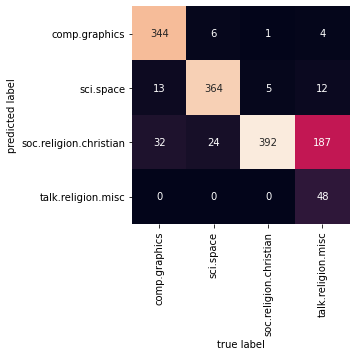

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [14]:
predict_category('sending a payload to the ISS')

'sci.space'

In [15]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [16]:
predict_category('determining the screen resolution')

'comp.graphics'

[Text(0.5, 0, 'Iteration'), Text(0.5, 1.0, 'Cross Entropy Loss')]

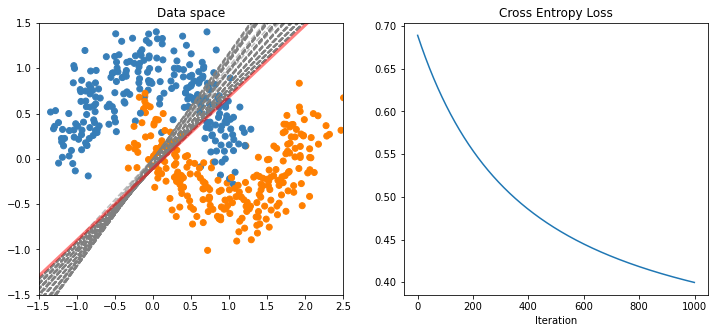

In [17]:
# Generate Toy Sample
import sklearn.datasets
X, Y = sklearn.datasets.make_moons(n_samples=500, noise=0.2)
colors = np.array(['#377eb8', '#ff7f00'])
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax1.scatter(X[:,0], X[:, 1], color=colors[Y])
ax1.set(xlim=(-1.5, 2.5), ylim=(-1.5, 1.5), title='Data space')

X, Y = X.T, Y.reshape(1, Y.shape[0]) # add dimension

## Set learing parameters
epochs = 1000
eta = 0.01

## Define Sigmoid function
def sigmoid(z): 
    return 1/(1+np.exp(-z))

## Initialize coefficients
m = X.shape[1]
w = np.random.randn(X.shape[0], 1)*0.01 # nearly zero but not zero exactly
b = 0

## Iterative Update
losstrack=[]
for epoch in range(epochs):
    # log-odd
    z = np.dot(w.T, X) + b
    
    # prediction by z
    p = sigmoid(z) 
    
    # cross entropy error averaged
    cost = -np.sum(np.multiply(np.log(p), Y) + np.multiply((1-Y), np.log(1-p)))/m 
    losstrack.append(np.squeeze(cost))
    
    # Move coefficients by...
    dz = p-Y
    dw = (1/m) * np.dot(X, dz.T)
    db = (1/m) * np.sum(dz)
    w = w - eta * dw
    b = b - eta * db
    
    # Plot Decision Boundary
    if epoch & 100 == 0:
        db = -b/w[1] - w[0]/w[1] * np.linspace(-3, 3, 100)
        ax1.plot(np.linspace(-3, 3, 100), db.T, label='Decision Boundary', 
                 linestyle='--',color='grey', alpha=0.5)

## Plot Results
db = -b/w[1] - w[0]/w[1] * np.linspace(-3, 3, 100)
ax1.plot(np.linspace(-3, 3, 100), db.T, label='Decision Boundary', 
         linewidth=3, color='red', alpha=0.5)

ax2 = fig.add_subplot(122)
ax2.plot(losstrack)
ax2.set(title='Cross Entropy Loss', xlabel='Iteration')

0.854


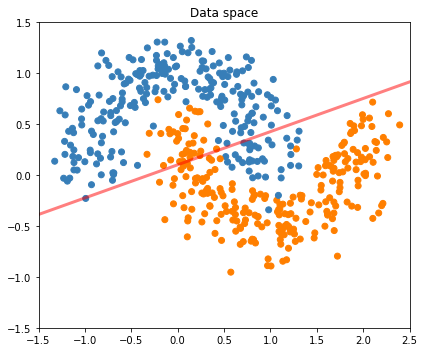

In [18]:
from sklearn.linear_model import LogisticRegression
X, Y = sklearn.datasets.make_moons(n_samples=500, noise=0.2)
clf = LogisticRegression(solver='sag', max_iter=100).fit(X, Y)
clf.predict(X[:100,:]) # return class
clf.predict_proba(X[:100,:]) # return probability
print(clf.score(X, Y)) # return 1- Error rate in Training set

## Plot Decision Surface
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.scatter(X[:,0], X[:, 1], color=colors[Y])
ax1.set(xlim=(-1.5, 2.5), ylim=(-1.5, 1.5), title='Data space')
w = clf.coef_; b = clf.intercept_
db = -b/w[:,1] - w[:,0]/w[:,1] * np.linspace(-3, 3, 100)
ax1.plot(np.linspace(-3, 3, 100), db.T, label='Decision Boundary', 
         linewidth=3, color='red', alpha=0.5)
fig.tight_layout()

0.952


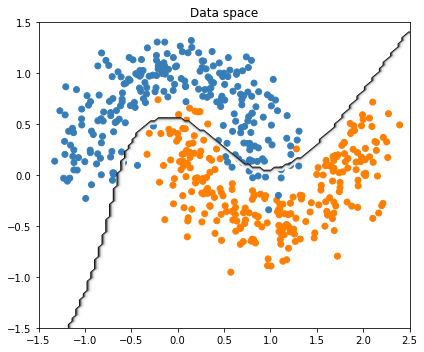

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False) # No column of 1s
X_poly = poly.fit_transform(X)
clf = LogisticRegression().fit(X_poly, Y)
print(clf.score(X_poly, Y)) # return 1- Error rate in Training set

## Plot Results
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.scatter(X[:,0], X[:, 1], color=colors[Y])
ax1.set(xlim=(-1.5, 2.5), ylim=(-1.5, 1.5), title='Data space')

## Plot Decision Surface
r1 = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
r2 = np.linspace(ax1.get_ylim()[0], ax1.get_ylim()[1], 100)
R1, R2 = np.meshgrid(r1, r2)
R = np.c_[R1.ravel(), R2.ravel()]
R_poly = poly.fit_transform(R)
Z = clf.predict(R_poly).reshape(R1.shape)
plt.contour(R1, R2, Z, cmap="Greys_r")

fig.tight_layout()